# CSE 555 - Introduction to Pattern Recognition
## Programming Assignment 4 - Multi-layer Perceptron Neural Networks and Convolution Neural Networks
### Siddheswar Chandrasekhar
<br>

In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Author: Siddheswar C
# @Email: innocentdevil.sid007@gmail.com


import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
%matplotlib inline

Using TensorFlow backend.


## Model Definitions

### Neural Network

In [0]:
class NeuralNet:

    def __init__(self, num_of_layers=1, l2=False):

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Flatten())

        if l2:
            for _ in range(num_of_layers):
                self.model.add(
                    tf.keras.layers.Dense(
                        30, activation=tf.sigmoid,
                        kernel_regularizer=tf.keras.regularizers.l2(5)
                    )
                )

        else:
            for _ in range(num_of_layers):
                self.model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))

        self.model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

        self.yhat = []
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    def predict(self, x, y):
        self.yhat = np.argmax(self.model.predict(x), axis=1)
        accuracy = metrics.accuracy_score(y, self.yhat)

        return accuracy

    def fit(self, x, y, validation_data, epochs):
        return self.model.fit(x, y, validation_data=validation_data, epochs=epochs, batch_size=10, verbose=0)

### Convolutional Neural Network

In [0]:
class ConvolutionalNeuralNet:
    
    def __init__(self):
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        
        self.model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.1),
              metrics=['accuracy'])
    
    def shift_rotate(self, rotate_degree, shift_pixel):
        self.datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=rotate_degree,
            width_shift_range=shift_pixel,
            height_shift_range=shift_pixel,
            horizontal_flip=True
        )
        
    def predict(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test, verbose=0)
      
    def fit(self, x, y, validation_data, batch_size, epochs):
        self.model.fit_generator(self.datagen.flow(
                                      train_x, train_y,
                                      batch_size=batch_size),
                                      steps_per_epoch=len(train_x)/batch_size,
                                      epochs=epochs,
                                      verbose=0
                                )

## MNIST Dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:x_train.shape[0]-10000]
y_train = y_train[:y_train.shape[0]-10000]

data = {}

for i in range(10):
    data[i] = list()

for i in range(len(x_train)):
    data[y_train[i]].append(x_train[i])

In [0]:
train_x = list()
train_y = list()

for i in range(len(data)):
    for j in range(100):
        train_x.append(data[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

## Neural Network

### 1 hidden layer

In [0]:
nn = NeuralNet()
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Instructions for updating:
Colocations handled automatically by placer.
Accuracy: 87.44%


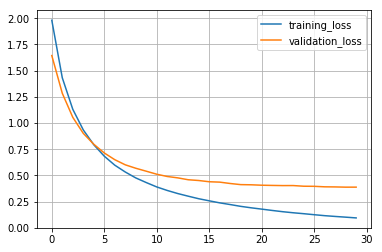

In [0]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

### 2 hidden layers

In [0]:
nn = NeuralNet(num_of_layers=2)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 84.84%


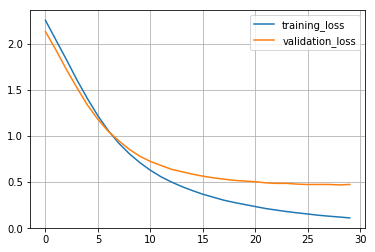

In [0]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

### 3 hidden layers

In [0]:
nn = NeuralNet(num_of_layers=3)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 82.29%


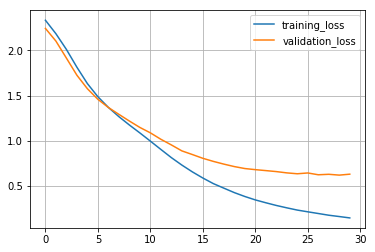

In [0]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

### 1 hidden layer with L2 regularization

In [0]:
nn = NeuralNet(l2=True)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 13.22%


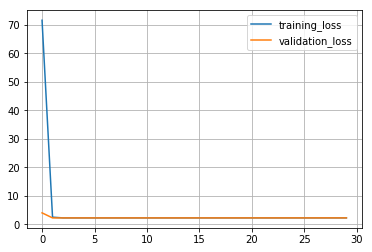

In [0]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

### 2 hidden layers with L2 regularization

In [0]:
nn = NeuralNet(num_of_layers=2, l2=True)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 10.09%


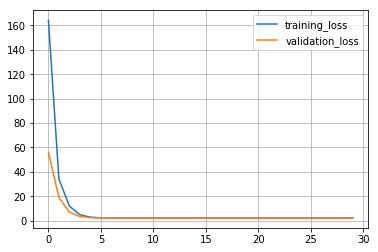

In [0]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

### 3 hidden layers with L2 regularization

In [0]:
nn = NeuralNet(num_of_layers=3, l2=True)
train = nn.fit(train_x, train_y, (x_val, y_val), epochs=30)
accuracy = nn.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")

Accuracy: 8.92%


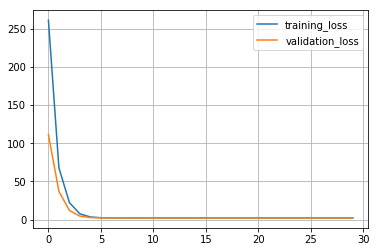

In [0]:
df = pd.DataFrame()
df['training_loss'] = train.history['loss']
df['validation_loss'] = train.history['val_loss']
df.plot(grid=True)

## CNN

In [0]:
cnn = ConvolutionalNeuralNet()
cnn.shift_rotate(rotate_degree=3, shift_pixel=3)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
cnn.fit(train_x, train_y, (x_val, y_val), batch_size=128, epochs=10)
accuracy = cnn.predict(x_test, y_test)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
print("Accuracy: " + str(round(accuracy[1]*100, 2)) + "%")

Accuracy: 14.23%
